In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

In [2]:
data=pd.read_csv('train.csv')

C:\Users\HP\AppData\Local\Temp\ipykernel_10172\4171409585.py:1: DtypeWarning: Columns (8) have mixed types. Specify dtype option on import or set low_memory=False.
  data=pd.read_csv('train.csv')


In [3]:
data

,Date received,Product,Issue,Sub-issue,Consumer complaint narrative,Company public response,Company,State,ZIP code,Tags,Consumer consent provided?,Submitted via,Date sent to company,Company response to consumer,Timely response?,Consumer disputed?,Complaint ID
0,2016-10-03,Credit reporting,Incorrect information on credit report,Account terms,NaN,NaN,"EQUIFAX, INC.",AZ,85249.0,NaN,Consent not provided,Web,2016-10-03,Closed with explanation,Yes,No,5990371
1,2020-02-27,Personal consumer reports,Incorrect information on your report,Information belongs to someone else,NaN,NaN,"EQUIFAX, INC.",GA,30043.0,NaN,Consent withdrawn,Web,2020-02-27,Closed with explanation,Yes,NaN,3562966
2,2021-11-04,Mortgage,Struggling to pay mortgage,NaN,Himy name is XXXX XXXX. I have been married fo...,Company believes it acted appropriately as aut...,"SELECT PORTFOLIO SERVICING, INC.",FL,34240.0,NaN,Consent provided,Web,2021-11-04,Closed with explanation,Yes,NaN,1657007
3,2022-03-16,Debt collection,False statements or representation,Attempted to collect wrong amount,Hello! \n\nXXXX XXXX has been trying to collec...,NaN,Patient Accounting Service Center,FL,32207,NaN,Consent provided,Web,2022-03-16,Closed with explanation,Yes,NaN,5069898
4,2022-06-27,Personal consumer reports,Improper use of your report,Reporting company used your report improperly,XXXX accordance with the Fair Credit Reporting...,Company has responded to the consumer and the ...,Experian Information Solutions Inc.,MO,63123.0,NaN,Consent provided,Web,2022-06-27,Closed with non-monetary relief,Yes,NaN,2891849
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2684448,2022-07-21,Credit card,Problem with a purchase shown on your statement,Credit card company isn't resolving a dispute ...,There was a fraud charge made mid to end of XX...,NaN,"Bread Financial Holdings, Inc.",CA,93065.0,NaN,Consent provided,Web,2022-07-21,Closed with monetary relief,Yes,NaN,933621
2684449,2013-03-07,Mortgage,Credit decision / Underwriting,NaN,NaN,NaN,Ocwen Financial Corporation,CA,93940.0,NaN,NaN,Web,2013-03-08,Closed with explanation,Yes,No,2707816
2684450,2014-10-15,Debt collection,Disclosure verification of debt,Not given enough info to verify debt,NaN,NaN,"URS Holding, LLC",WI,53092.0,NaN,NaN,Referral,2014-10-21,Closed with explanation,Yes,No,2950693
2684451,2014-07-28,Mortgage,"Loan servicing, payments, escrow account",NaN,NaN,NaN,"Caliber Home Loans, Inc.",NJ,7064.0,NaN,NaN,Web,2014-07-28,Closed with explanation,Yes,No,1618139


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2684453 entries, 0 to 2684452
Data columns (total 17 columns):
 #   Column                        Dtype 
---  ------                        ----- 
 0   Date received                 object
 1   Product                       object
 2   Issue                         object
 3   Sub-issue                     object
 4   Consumer complaint narrative  object
 5   Company public response       object
 6   Company                       object
 7   State                         object
 8   ZIP code                      object
 9   Tags                          object
 10  Consumer consent provided?    object
 11  Submitted via                 object
 12  Date sent to company          object
 13  Company response to consumer  object
 14  Timely response?              object
 15  Consumer disputed?            object
 16  Complaint ID                  int64 
dtypes: int64(1), object(16)
memory usage: 348.2+ MB


In [5]:
data['Date received'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 2684453 entries, 0 to 2684452
Series name: Date received
Non-Null Count    Dtype 
--------------    ----- 
2684453 non-null  object
dtypes: object(1)
memory usage: 20.5+ MB


In [6]:
data['Date received'].value_counts()

2022-05-03    3276
2017-09-08    3206
2022-04-19    3198
2022-05-04    3190
2022-04-27    3108
              ... 
2011-12-24      11
2011-12-25       9
2017-04-22       9
2014-03-09       5
2022-05-07       4
Name: Date received, Length: 3964, dtype: int64

In [7]:
data['Date received']=pd.to_datetime(data['Date received'])

In [12]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2684453 entries, 0 to 2684452
Data columns (total 17 columns):
 #   Column                        Dtype         
---  ------                        -----         
 0   Date received                 datetime64[ns]
 1   Product                       object        
 2   Issue                         object        
 3   Sub-issue                     object        
 4   Consumer complaint narrative  object        
 5   Company public response       object        
 6   Company                       object        
 7   State                         object        
 8   ZIP code                      object        
 9   Tags                          object        
 10  Consumer consent provided?    object        
 11  Submitted via                 object        
 12  Date sent to company          object        
 13  Company response to consumer  object        
 14  Timely response?              object        
 15  Consumer disputed?            ob

In [22]:
data['Date received']=pd.to_numeric(data['Date received']).astype('int')/pow(10,7)

In [23]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2684453 entries, 0 to 2684452
Data columns (total 17 columns):
 #   Column                        Dtype  
---  ------                        -----  
 0   Date received                 float64
 1   Product                       object 
 2   Issue                         object 
 3   Sub-issue                     object 
 4   Consumer complaint narrative  object 
 5   Company public response       object 
 6   Company                       object 
 7   State                         object 
 8   ZIP code                      object 
 9   Tags                          object 
 10  Consumer consent provided?    object 
 11  Submitted via                 object 
 12  Date sent to company          object 
 13  Company response to consumer  object 
 14  Timely response?              object 
 15  Consumer disputed?            object 
 16  Complaint ID                  int64  
dtypes: float64(1), int64(1), object(15)
memory usage: 348.2+ MB


In [24]:
data['Product'].value_counts()

Personal consumer reports      1204235
Debt collection                 401213
Mortgage                        326434
Credit card                     152059
Credit reporting                126611
Checking or savings account     123222
Bank account or service          77669
Prepaid card                     75319
Student loan                     62796
Money service                    41275
Vehicle loan or lease            32368
Consumer Loan                    28463
Personal loan                    21964
Payday loan                       5015
Money transfers                   4829
Other financial service            964
Virtual currency                    17
Name: Product, dtype: int64

In [25]:
from sklearn.preprocessing import LabelEncoder
data['Product']=LabelEncoder().fit_transform(data['Product'])

In [27]:
data['Product'].isna().value_counts()

False    2684453
Name: Product, dtype: int64

In [28]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2684453 entries, 0 to 2684452
Data columns (total 17 columns):
 #   Column                        Dtype  
---  ------                        -----  
 0   Date received                 float64
 1   Product                       int32  
 2   Issue                         object 
 3   Sub-issue                     object 
 4   Consumer complaint narrative  object 
 5   Company public response       object 
 6   Company                       object 
 7   State                         object 
 8   ZIP code                      object 
 9   Tags                          object 
 10  Consumer consent provided?    object 
 11  Submitted via                 object 
 12  Date sent to company          object 
 13  Company response to consumer  object 
 14  Timely response?              object 
 15  Consumer disputed?            object 
 16  Complaint ID                  int64  
dtypes: float64(1), int32(1), int64(1), object(14)
memory usage: 337.9

In [30]:
data['Issue'].describe()

count                                  2684453
unique                                     165
top       Incorrect information on your report
freq                                    655550
Name: Issue, dtype: object

In [31]:
data['Issue']=LabelEncoder().fit_transform(data['Issue'])

In [32]:
data['Sub-issue'].isna().value_counts()

False    2074445
True      610008
Name: Sub-issue, dtype: int64

In [33]:
data['Sub-issue'].describe()

count                                 2074445
unique                                    221
top       Information belongs to someone else
freq                                   419577
Name: Sub-issue, dtype: object

In [38]:
data['Issue'].value_counts()

75     655550
114    325473
72     202774
13     134270
82     101047
        ...  
130         8
79          7
129         6
81          5
78          3
Name: Issue, Length: 165, dtype: int64

In [40]:
data['Sub-issue']=LabelEncoder().fit_transform(data['Sub-issue'])

<AxesSubplot:xlabel='Issue', ylabel='Sub-issue'>

C:\Users\HP\anaconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


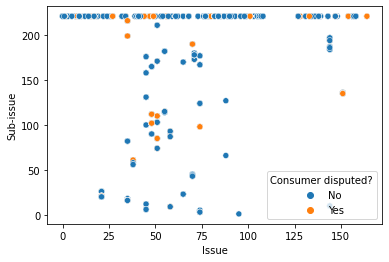

In [42]:
sb.scatterplot(data=data,x='Issue',y='Sub-issue',hue='Consumer disputed?')

In [55]:
data['Sub-issue'].value_counts()

221    610008
95     419577
193    171786
181    121572
54      79109
        ...  
100         6
218         4
146         3
55          1
89          1
Name: Sub-issue, Length: 222, dtype: int64

In [56]:
data['Sub-issue'].fillna(data['Sub-issue'].mode()[0],inplace=True)

In [57]:
data['Sub-issue'].isna().value_counts()

False    2684453
Name: Sub-issue, dtype: int64

In [58]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2684453 entries, 0 to 2684452
Data columns (total 17 columns):
 #   Column                        Dtype  
---  ------                        -----  
 0   Date received                 float64
 1   Product                       int32  
 2   Issue                         int32  
 3   Sub-issue                     int32  
 4   Consumer complaint narrative  object 
 5   Company public response       object 
 6   Company                       object 
 7   State                         object 
 8   ZIP code                      object 
 9   Tags                          object 
 10  Consumer consent provided?    object 
 11  Submitted via                 object 
 12  Date sent to company          object 
 13  Company response to consumer  object 
 14  Timely response?              object 
 15  Consumer disputed?            object 
 16  Complaint ID                  int64  
dtypes: float64(1), int32(3), int64(1), object(12)
memory usage: 317.5

In [60]:
data['Consumer complaint narrative'].isna().value_counts()

True     1722487
False     961966
Name: Consumer complaint narrative, dtype: int64

In [61]:
data['Consumer complaint narrative'].fillna(method='ffill',inplace=True)

In [62]:
data['Consumer complaint narrative'].isna().value_counts()

False    2684451
True           2
Name: Consumer complaint narrative, dtype: int64

In [63]:
data['Consumer complaint narrative'].fillna(method='bfill',inplace=True)

In [64]:
data['Consumer complaint narrative'].isna().value_counts()

False    2684453
Name: Consumer complaint narrative, dtype: int64

In [66]:
import re
new_text=[]
for sent in data['Consumer complaint narrative']:
    temp_str=re.sub(r"http\S+"," ",sent)
    temp_str=re.sub(r"www\S+"," ",temp_str)
    new_text.append(temp_str)

In [68]:
len(new_text)

2684453

In [71]:
import nltk
import re
nltk.download('stopwords')
from nltk.corpus import stopwords
from nltk.stem import SnowballStemmer
from nltk.stem.wordnet import WordNetLemmatizer

stop=set(stopwords.words('english'))
sno_stem=SnowballStemmer('english')
# print(stop)
# print(sno_stem.stem('happy'))

def cleanhtml(sentence):
    patt=re.compile('<.*?>')
    clean=re.sub(patt,' ',sentence)
    return clean
def decontracted(phrase):
    # specific
    phrase = re.sub(r"won't", "will not", phrase)
    phrase = re.sub(r"can\'t", "can not", phrase)

    # general
    phrase = re.sub(r"n\'t", " not", phrase)
    phrase = re.sub(r"\'re", " are", phrase)
    phrase = re.sub(r"\'s", " is", phrase)
    phrase = re.sub(r"\'d", " would", phrase)
    phrase = re.sub(r"\'ll", " will", phrase)
    phrase = re.sub(r"\'t", " not", phrase)
    phrase = re.sub(r"\'ve", " have", phrase)
    phrase = re.sub(r"\'m", " am", phrase)
    return phrase
def cleanpunc(sentence):
    clean=re.sub(r'[^A-Za-z0-9]+',' ',sentence)
    return clean
def cleanalphanum(sentence):
    clean=re.sub("\S*\d\S*", "", sentence).strip()
    return clean


def preprocess(sentences):
    i=0
    prepro_reviews=[]
    for sent in sentences.values:
        sent=cleanhtml(sent)
        sent=cleanpunc(sent)
        sent=cleanalphanum(sent)
        sent=decontracted(sent)
        words=[]
        for word in sent.split(" "):
            if word not in stop:
                s=sno_stem.stem(word.lower()).encode('utf8')
                words.append(s)
        sent=b" ".join(words)
        prepro_reviews.append(sent)
        i+=1
    #print(prepro_reviews)
    return prepro_reviews

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\HP\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\stopwords.zip.


In [72]:
def preprocess2(sentences):
    prepro_reviews=preprocess(sentences)
    list_of_sentence=[]
    for sentence in prepro_reviews:
        list_of_sentence.append(sentence.decode().split())
    # for sent in list_of_sentence:
    #     for word in sent:
    #print(list_of_sentence)
    return list_of_sentence

In [ ]:
sentences=pd.Series(new_text)
prepro_text=preprocess2(sentences)

In [ ]:
prepro_text[0]